### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)




#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn import linear_model,ensemble, tree, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
#import ml_insights as mli
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv("../../challenges_data/2013_movies.csv")

df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
constant              100 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [119]:
def MY_REGRESSION_TRAIN_FIT(x,y):

    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, np.log(y), test_size = .1, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    ### Get the predictions on the training & test set
    y_train_pred = lr_model.predict(x_train)
    y_test_pred  = lr_model.predict(x_test)

    #calculate mean square error
    mse = mean_squared_error(y_test, y_test_pred)

    # what's the R2 is for linear regression
    r2 = r2_score(y_test, y_test_pred)

    #print('\n Coefficients & Intercept: \n', lr_model.coef_, lr_model.intercept_)

    # The mean squared error
    #print("\n Mean squared error: %.5f" % mse)
    
    # Explained variance score: 1 is perfect prediction
    #print('\n Variance score: %.5f' % r2)

    coef = list(zip( x.columns , lr_model.coef_))
    
    return mse, r2, coef, lr_model.intercept_, y_train_pred


In [61]:
# create constant column
df["constant"] = 1

x = pd.DataFrame(np.array(df.loc[:, "constant"]))

x.columns = ['constant']

y = df.loc[:, "DomesticTotalGross"]


lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)


#y - y_pred
#list(zip(["mse", "r2", "coef", "intercept"], (mse, r2, coef, intercept)))


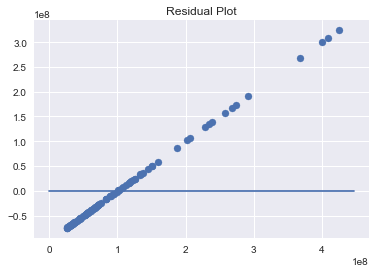

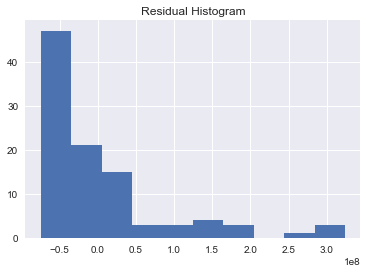

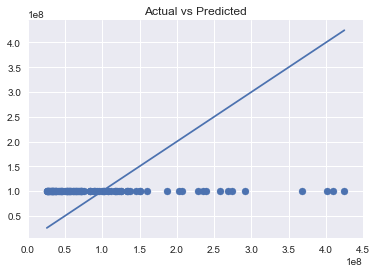

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.plot(np.linspace(0,10**8.65,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred)
plt.title("Residual Plot")

plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred)
plt.title("Actual vs Predicted")


### <font color='green'>Answer 1.  using the constant term alone didn't output much signal as all the "outcomes" are the same</font>

### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [15]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


mse:  6.91410425055e+15  r2:  0.0856476823693


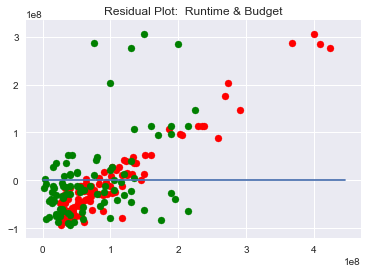

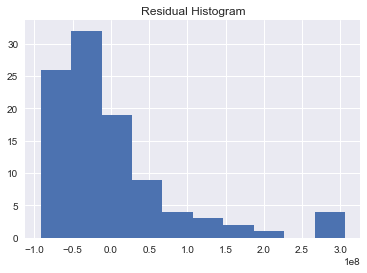

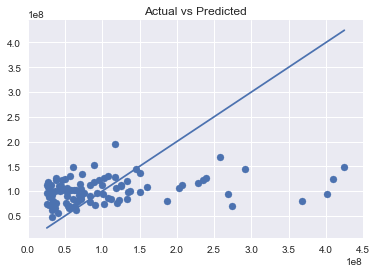

In [4]:
%matplotlib inline

# create constant column
x_col_name = "Runtime"
df2 = df.loc[:, [x_col_name,"DomesticTotalGross"]]
df2["constant"] = 1

x = df2.loc[:, [x_col_name,"constant"]]
y = df2["DomesticTotalGross"]


lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.plot(np.linspace(0,10**8.65,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred, c="red")
plt.scatter(df.loc[:,"Budget"], y - y_pred, c="green")
plt.title("Residual Plot:  Runtime & Budget")

plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred)
plt.title("Actual vs Predicted")

#calculate mean square error
mse = mean_squared_error(y, y_pred)

# what's the R2 is for linear regression
r2 = r2_score(y, y_pred)

print("mse: ", mse, " r2: ", r2)



### <font color='green'>Ans:  the model is showing that there's some correlation between variable Runtime  and Domestic Sales</font>

#### Challenge 3

<pre>
Repeat the process of challenge 1, but add a categorical feature (like genre). 

You'll have to convert a column of text into a number of numerical columns 
("dummy variables"). How can you interpret what's happening in the model?

</pre>

mse:  5.93745002819e+15  r2:  0.214804839881


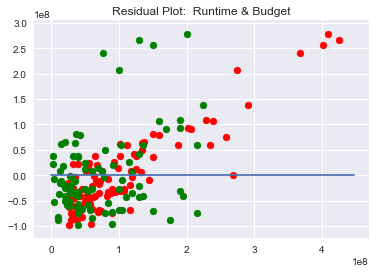

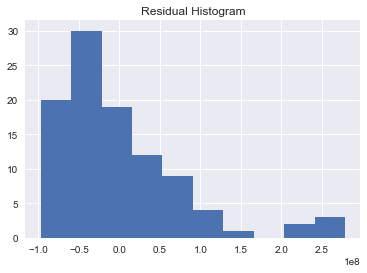

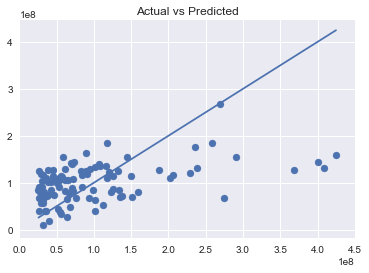

In [5]:
%matplotlib inline

# create constant column
df3 = df.loc[:, ["Runtime", "Rating","DomesticTotalGross"]]
df3["constant"] = 1

# expand Ratings category
df3_expanded = pd.get_dummies(data=df3, columns=['Rating'])
df3_expanded.head()

x = df3_expanded.loc[:, ["Runtime", 'Rating_G', 'Rating_PG',
       'Rating_PG-13', 'Rating_R', "constant"]]
y = df3_expanded["DomesticTotalGross"]


lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.plot(np.linspace(0,10**8.65,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred, c="red")
plt.scatter(df.loc[:,"Budget"], y - y_pred, c="green")
plt.title("Residual Plot:  Runtime & Budget")

plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred)
plt.title("Actual vs Predicted")

#calculate mean square error
mse = mean_squared_error(y, y_pred)

# what's the R2 is for linear regression
r2 = r2_score(y, y_pred)

print("mse: ", mse, " r2: ", r2)




### <font color="green">Ans: after adding the ratings dummies the R2 increased from 0.08 to 0.21 - so the ratings feature improved the model
</font>

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.



mse:  4.19119971611e+12  r2:  0.999445736854


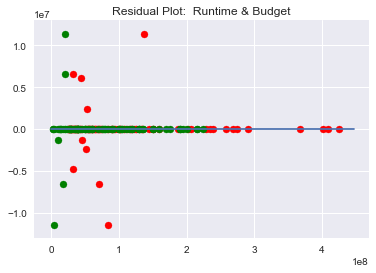

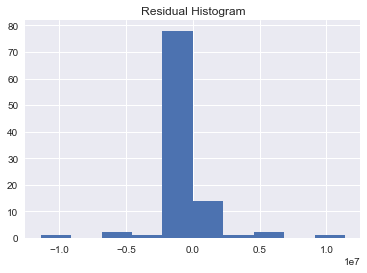

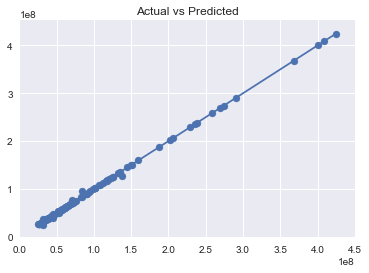

In [6]:
%matplotlib inline

# create constant column
df4 = df.loc[:, ["Runtime", "Rating", "DomesticTotalGross", "Director"]]
df4["constant"] = 1

# expand Ratings category
df4_expanded = pd.get_dummies(data=df4, columns=['Rating','Director'])
df4_expanded.head()

y = df4_expanded["DomesticTotalGross"]
x = df4_expanded
del x["DomesticTotalGross"]  # drop y from the x data set



#==================================
# run the model & plot

%matplotlib inline


lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.plot(np.linspace(0,10**8.65,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred, c="red")
plt.scatter(df.loc[:,"Budget"], y - y_pred, c="green")
plt.title("Residual Plot:  Runtime & Budget")


plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred)
plt.title("Actual vs Predicted")



In [7]:
#calculate mean square error
mse = mean_squared_error(y, y_pred)

# what's the R2 is for linear regression
r2 = r2_score(y, y_pred)

print("mse: ", mse, " r2: ", r2)



mse:  4.19119971611e+12  r2:  0.999445736854


### Ans (4):  
<font color=green>
    
        As evident above the R2 now is 0.99 much higher than previous
       and the predicted values are now hugging the actual values
       by adding the 3 predictors:  Runtime, Rating & Director
       allowed us to reach a model that closely matches the actual 
       (ie: very low RMSE)
        
</font>

#### Challenge 5

<pre>
Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

</pre>

mse:  1.19979037001e+16  r2:  -0.439172455606


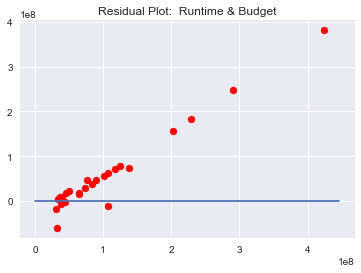

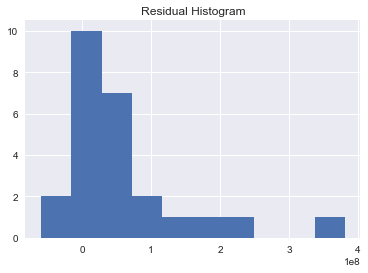

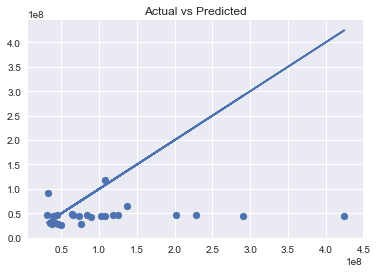

In [14]:
%matplotlib inline

# create constant column
df4 = df.loc[:, ["Runtime", "Rating", "DomesticTotalGross", "Director"]]
df4["constant"] = 1

# expand Ratings category
df4_expanded = pd.get_dummies(data=df4, columns=['Rating','Director'])
df4_expanded.head()

y = df4_expanded["DomesticTotalGross"]
x = df4_expanded
del x["DomesticTotalGross"]  # drop y from the x data set

# split data into train & test
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = .25, random_state=42)


#==================================
# run the model & plot

%matplotlib inline

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

### Get the predictions on the training & test set
y_train_pred = lr_model.predict(x_train)
y_test_pred  = lr_model.predict(x_test)



plt.plot(np.linspace(0,10**8.65,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y_test, y_test - y_test_pred, c="red")
#plt.scatter(y_test.loc[:,"Budget"], y_test - y_test_pred, c="green")
plt.title("Residual Plot:  Runtime & Budget")


plt.figure()
plt.hist(y_test - y_test_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_test_pred)
plt.title("Actual vs Predicted")


#calculate mean square error
mse = mean_squared_error(y_test, y_test_pred)

# what's the R2 is for linear regression
r2 = r2_score(y_test, y_test_pred)

print("mse: ", mse, " r2: ", r2)



    

<font color="green">
### Ans: the error on the test set seems much higher.  
    which suggest that our model maybe overfitting on the data set.
</font>